In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tweets.csv')
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [3]:
df.describe()

,id,label
count,7920.000000,7920.000000
mean,3960.500000,0.255808
std,2286.451399,0.436342
min,1.000000,0.000000
25%,1980.750000,0.000000
50%,3960.500000,0.000000
75%,5940.250000,1.000000
max,7920.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [5]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
df.label.value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [7]:
## not a big class imbalance so it can be worked upon

In [8]:
# importing regular expression module and working on the first dataset 
import re

In [9]:
df.tweet[0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [10]:
re.sub("@[A-Za-z0-9]+", "", df['tweet'][0])

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [11]:
#removing hashtags
re.sub("#", "", df['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [12]:
#removing hyperlinks
re.sub(r"http\S+", "", df['tweet'][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [13]:
#removing special characters
re.sub(r"[^a-zA-Z]", " ", df['tweet'][0])

' fingerprint  Pregnancy Test https   goo gl h MfQV  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone'

In [14]:
#import stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divambadaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
s_word = set(stopwords.words('english'))
len(s_word)

179

In [16]:
#stemming and lemitaization
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/divambadaya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/divambadaya/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [17]:
df.tweet[0].split()

['#fingerprint',
 '#Pregnancy',
 'Test',
 'https://goo.gl/h1MfQV',
 '#android',
 '#apps',
 '#beautiful',
 '#cute',
 '#health',
 '#igers',
 '#iphoneonly',
 '#iphonesia',
 '#iphone']

In [18]:
!pip install contractions

In [19]:
#now applying function for whole dataset
import contractions
def tweets_wo_s_words(text):
    processed= re.sub(r"'s\b", " is",text)
    processed= re.sub("#", "", processed)
    processed= re.sub("@[A-Za-z0-9]+", "", processed)
    processed = re.sub(r"http\S+", "", processed)
    processed= contractions.fix(processed)    
    processed= re.sub(r"[^a-zA-Z]", " ", processed)    
    processed= processed.lower().strip()
    
    cleaned = ''
    for token in processed.split():
        cleaned = cleaned + lemma.lemmatize(token) + ' '
    
    return cleaned

In [20]:
cleaned = []  # list of cleaned tweets
for txt in df.tweet:
    cleaned.append(tweets_wo_s_words(txt))

In [21]:
cleaned[:5]

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias ',
 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect ',
 'i am wired i know i am george i wa made that way iphone cute daventry home ',
 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support ']

In [22]:
df['tweets_having_swords']=cleaned
df.head()

,id,label,tweet,tweets_having_swords
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...
3,4,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i wa made that w...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk ...


In [23]:
#lets compare 1500 dataset
df['tweet'][1500]

'#Apple Bunch if Crooks Refused to repair/replace my beats wireless. Problem rubber on mic coming off microphones stopped working. Said warranty was void because ear piece looked chewed. Bullshit. I don’t have any animals and I would chew on anything I put in my ear. pic.twitter.com/GfgvquEpuC'

In [24]:
df['tweets_having_swords'][1500]

'apple bunch if crook refused to repair replace my beat wireless problem rubber on mic coming off microphone stopped working said warranty wa void because ear piece looked chewed bullshit i do not have any animal and i would chew on anything i put in my ear pic twitter com gfgvquepuc '

In [25]:
#now visualizing the data
#we can plot top 10 most used words in the tweet dataset
#so we can combine all of the tokens into a single list
#first we will perform this on our original dataset then on the processed dataset
all_words = []
for txt in df['tweet']:
    all_words.extend(txt.split())

print(all_words[:10])

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers']


In [26]:
len(set(all_words))

34348

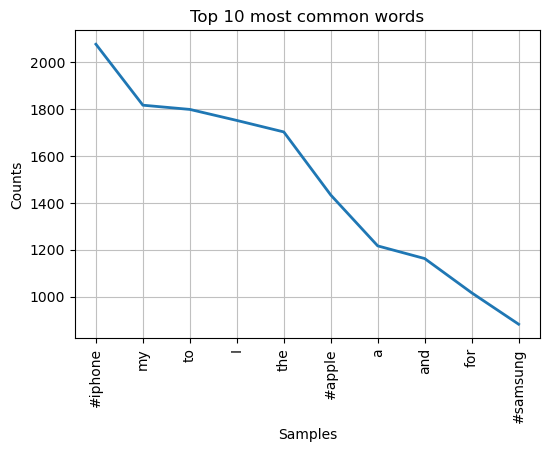

In [27]:
import matplotlib.pyplot as plt
dist = nltk.FreqDist(all_words)

plt.figure(figsize=(6,4))
plt.title('Top 10 most common words')
plt.xticks(fontsize=10)

dist.plot(10, cumulative=False)

plt.show()

In [28]:
#now for cleaned tweets
all_words = []
for txt in df['tweets_having_swords']:
    all_words.extend(txt.split())

print(all_words[:50])
len(set(all_words))

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'a', 'transparant', 'silicon', 'case', 'thanks', 'to', 'my', 'uncle', 'yay', 'sony', 'xperia', 's', 'sonyexperias', 'we', 'love', 'this', 'would', 'you', 'go', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'i', 'am', 'wired', 'i', 'know', 'i', 'am', 'george', 'i', 'wa']


15981

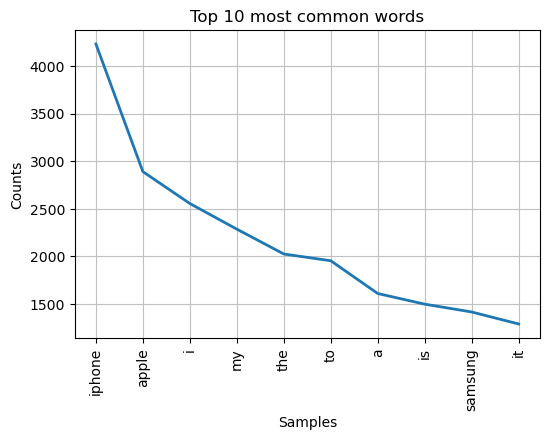

In [29]:
dist = nltk.FreqDist(all_words)

plt.figure(figsize=(6,4))
plt.title('Top 10 most common words')
plt.xticks(fontsize=10)

dist.plot(10, cumulative=False)

plt.show()

In [30]:
#now we remove stopwords from our original dataset by using function 
def tweet_wo_swords(text):
    processed= re.sub(r"'s\b", " is",text)
    processed= re.sub("#", "", processed)
    processed= re.sub("@[A-Za-z0-9]+", "", processed)
    processed = re.sub(r"http\S+", "", processed)
    processed= contractions.fix(processed)    
    processed= re.sub(r"[^a-zA-Z]", " ", processed)    
    processed= processed.lower().strip()
    
    processed = [token for token in processed.split() if token not in s_word]

    processed = [token for token in processed if len(token)>2]
    
    cleaned = ''
    for token in processed:
        cleaned = cleaned + lemma.lemmatize(token) + ' '
    
    return cleaned

In [31]:
cleaned = list(df['tweet'].apply(tweet_wo_swords))
print(cleaned[:5])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ', 'love would talk makememories unplug relax iphone smartphone wifi connect ', 'wired know george made way iphone cute daventry home ', 'amazing service apple even talk question unless pay stupid support ']


In [32]:
df['tweets_without_swords'] = cleaned
df.head()

,id,label,tweet,tweets_having_swords,tweets_without_swords
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...,fingerprint pregnancy test android apps beauti...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...,finally transparant silicon case thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...,love would talk makememories unplug relax ipho...
3,4,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i wa made that w...,wired know george made way iphone cute daventr...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk ...,amazing service apple even talk question unles...


In [33]:
all_words = []
for txt in df['tweets_without_swords']:
    all_words.extend(txt.split())

print(all_words[:50])


['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'would', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'made', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'even', 'talk', 'question', 'unless', 'pay', 'stupid']


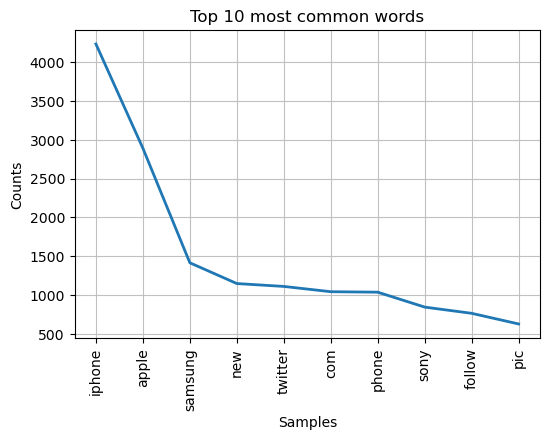

In [34]:
#now plotting
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(6,4))
plt.title('Top 10 most common words')
plt.xticks(fontsize=10)

freq_dist.plot(10, cumulative=False)

plt.show()

In [35]:
#now using bag of word models like -
#count vectorizer and tfidf

In [36]:
df.shape

(7920, 5)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(df['tweets_having_swords'])

In [38]:
CV_features.shape

(7920, 15955)

In [39]:
type(CV_features[0])

scipy.sparse._csr.csr_matrix

In [40]:
import pandas as pd
df1 = pd.DataFrame(CV_features.todense() )
df1
# Document-Term-Matrix X = [N x p ]
# N = no. of documents and p = no. of unique words

,0,1,2,3,4,5,6,7,8,9,...,15945,15946,15947,15948,15949,15950,15951,15952,15953,15954
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df1.size

126363600

In [42]:
import numpy as np
np.count_nonzero(df1)

114973

In [43]:
#first 20 vocabulary names
print(CV.get_feature_names_out()[:20]) 

['aa' 'aaaahhhhhhh' 'aag' 'aah' 'aalborg' 'aand' 'aapl' 'aarhus' 'aaron'
 'aarp' 'aarrrggghhhh' 'aashamsakal' 'aaydojbfkq' 'aayp' 'ab' 'abah'
 'abareta' 'abay' 'abb' 'abc']


In [44]:
CV_features[10].todense() 

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [45]:
CV.inverse_transform(np.asarray(CV_features[10].todense())) 

[array(['apple', 'color', 'crash', 'do', 'every', 'five', 'fuckin', 'hey',
        'inch', 'ipod', 'it', 'make', 'minite', 'new', 'not', 'or',
        'thinner', 'when', 'you'], dtype='<U41')]

In [46]:
#building the model for the predictions
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CV_features, df['label'], test_size=0.25, stratify=df['label'])

In [47]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train))  
print(LR.score(X_test, y_test))    

0.9752525252525253
0.8777777777777778


In [48]:
#currently the model is overfitting over the data due to its high accuracy in the training dataset
#going for l1 regularization
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train)) 
print(LR1.score(X_test, y_test))     

0.9148148148148149
0.8813131313131313


In [49]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
X = CV_features
y = df['label']

In [50]:
#now crossvalidating the model 

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

[0.89204545 0.87058081 0.87752525 0.8989899  0.88888889]
88.56 1.02


In [51]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR1, X, y, cv=kfold, scoring='accuracy', return_train_score=True)
results

{'fit_time': array([0.02256989, 0.02017808, 0.02026796, 0.01882982, 0.0197618 ]),
 'score_time': array([0.00052714, 0.00043488, 0.00046396, 0.00044298, 0.00044918]),
 'test_score': array([0.89204545, 0.87058081, 0.87689394, 0.8989899 , 0.88888889]),
 'train_score': array([0.91066919, 0.91477273, 0.90830177, 0.90830177, 0.90814394])}

In [52]:
#getting train error by mean 
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

91.0 0.25


In [53]:
#getting test error by mean 
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

88.55 1.03


In [54]:
#tuning hyperparameter for our model for the best results
#Using gridsearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [56]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [57]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 0.95001}, 0.8904040404040403, 19)

In [58]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

89.04040404040403

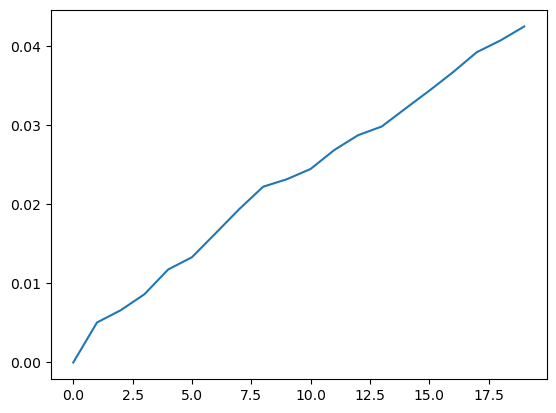

In [59]:
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])

In [60]:
#creating a pipeline and cross validate
from sklearn.pipeline import make_pipeline, Pipeline

X = df['tweets_having_swords']
y = df['label']

CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.6)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

88.7 0.87


In [61]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.6, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [62]:
CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.6, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [63]:
len(CV_pipe['CV'].vocabulary_) 

15955

In [64]:
#now without stop words data
from sklearn.pipeline import make_pipeline, Pipeline

X = df['tweets_having_swords']
y = df['label']

CV = CountVectorizer(stop_words='english',min_df=10, max_features=None)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.6)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

87.15 0.9


1096

In [65]:
#with 300 features max cap features
from sklearn.pipeline import make_pipeline, Pipeline
X = df['tweets_having_swords']
y = df['label']

CV = CountVectorizer(stop_words='english', min_df=10, max_features=300)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.6)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

85.78 1.18


300

In [66]:
#now using tfidf methods

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['tweets_having_swords']
y = df['label']
# select only those words which occur ATLEAST in 5 documents!! 

TFIDF = TfidfVectorizer(stop_words='english',  min_df=5, max_features=1000)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5)
CV_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  # no. of features AFTER applying the stopwords

87.7 0.13
86.09 1.07


1000

In [68]:
from sklearn.decomposition import TruncatedSVD

X = df['tweets_having_swords']
y = df['label']

TFIDF = TfidfVectorizer()  # will originally have 15955 features
SVD = TruncatedSVD(n_components=1000)  # reduce it to 1000 PCs

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5)
CV_pipe = Pipeline([('TFIDF', TFIDF), ('SVD', SVD), ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_) 

87.99 0.26
87.07 0.78


15955

In [69]:
CV_pipe.named_steps

{'TFIDF': TfidfVectorizer(),
 'SVD': TruncatedSVD(n_components=1000),
 'LR': LogisticRegression(C=0.5, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [70]:
#n gram models
X = df['tweets_having_swords']
y = df['label']

CV = CountVectorizer(stop_words='english',  ngram_range=(1, 2), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  

89.68 0.32
87.26 0.77


3429

In [71]:
CV_pipe.named_steps

{'CV': CountVectorizer(min_df=5, ngram_range=(1, 2), stop_words='english'),
 'LR': LogisticRegression(C=0.5, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [72]:
!pip install mglearn
import mglearn

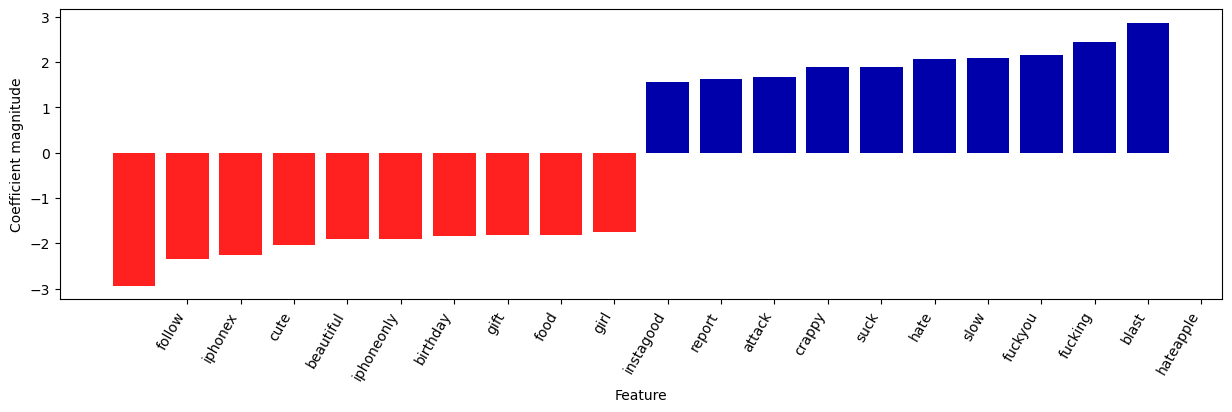

In [73]:
# Most important features when using unigrams, bigrams, and trigrams with tf-idf rescaling

# extract feature names and coefficients for Unigram Model
# CV = CV_pipe.named_steps['CV']
feature_names = np.array(CV.get_feature_names_out())
# LR = CV_pipe.named_steps['LR']


LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=10)

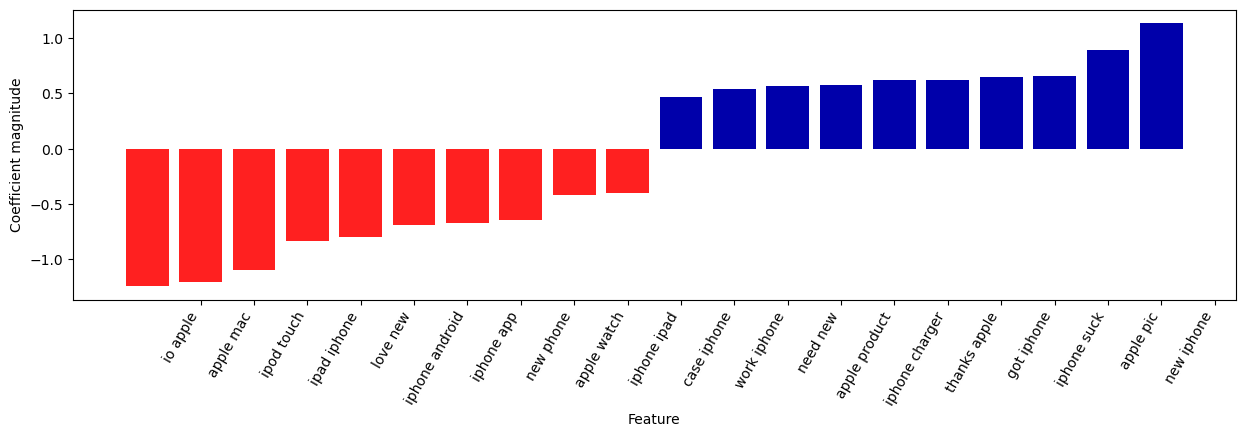

In [74]:
# Visualizing only the trigrams
# find 2-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 2

LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_

# visualize only 2-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=10)

In [75]:
# Unigrams + Bigrams + Trigrams
X = df['tweets_having_swords']
y = df['label']

CV = CountVectorizer(stop_words='english',  ngram_range=(1, 3), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

89.68 0.33
87.26 0.77


4033

In [76]:
len(coef.ravel()), len(feature_names)

(3429, 3429)

In [77]:
#now using word embeddings
!pip install gensim 

In [78]:
tweets_list = list(df['tweets_having_swords'].apply(lambda x: x.split()))
tweets_list[0] 

['fingerprint',
 'pregnancy',
 'test',
 'android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone']

In [79]:
from gensim.models import Word2Vec
# train model
cbow_model = Word2Vec(tweets_list, vector_size = 300, window = 3, min_count=5, sg=0)

In [80]:
print(cbow_model)

Word2Vec<vocab=2420, vector_size=300, alpha=0.025>


In [81]:
cbow_model.wv.index_to_key[:20]

['iphone',
 'apple',
 'i',
 'my',
 'the',
 'to',
 'a',
 'is',
 'samsung',
 'it',
 'and',
 'you',
 'new',
 'twitter',
 'for',
 'com',
 'phone',
 'me',
 'sony',
 'not']

In [82]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    
    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in cbow_model.wv.index_to_key]
    
    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(cbow_model.wv.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean


In [83]:
tweets_temp = df['tweets_having_swords'].apply(document_vector)

In [84]:
tweets_temp[:5]

0    [0.040095273, 0.272215, -0.023567973, 0.066689...
1    [-0.03361573, 0.21174955, -0.031294186, 0.0532...
2    [-0.0030170071, 0.16637136, 0.044696, 0.153368...
3    [0.025781957, 0.17104255, 0.05196487, 0.212437...
4    [-0.0009693787, 0.16305266, 0.029677456, 0.184...
Name: tweets_having_swords, dtype: object

In [85]:
tweets_temp[0].shape

(300,)

In [86]:
type(tweets_temp)

pandas.core.series.Series

In [87]:
embedding_size = 300
tweets_vec = np.ones((len(tweets_temp), embedding_size))*np.nan
for i in range(tweets_vec.shape[0]):
    tweets_vec[i,:] = tweets_temp.iloc[i]

tweets_vec.shape # this itself is your final FEATURE MATRIX

(7920, 300)

In [88]:
# Create a new DF to store these new documnent features
df2 = pd.DataFrame(tweets_vec)
df2['y'] = df['label']
df2.dropna(how='any', axis=0, inplace=True)

In [89]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,y
0,0.040095,0.272215,-0.023568,0.066690,0.075260,-0.431905,0.131177,0.549878,-0.095372,0.039916,...,0.297745,0.058963,0.063315,0.221678,0.333238,-0.019572,-0.179931,0.208739,-0.065476,0
1,-0.033616,0.211750,-0.031294,0.053249,-0.001183,-0.281349,0.171068,0.431182,0.037770,-0.299576,...,0.261476,0.150040,0.012488,0.256052,0.273915,-0.022342,-0.230611,0.168176,-0.145694,0
2,-0.003017,0.166371,0.044696,0.153368,-0.051536,-0.172826,0.177840,0.461562,0.114119,-0.188202,...,0.249109,0.149406,0.064434,0.283282,0.244597,0.016797,-0.078467,0.095651,-0.121211,0
3,0.025782,0.171043,0.051965,0.212438,-0.085141,-0.151193,0.217241,0.530055,0.177968,-0.261244,...,0.278793,0.192491,0.076939,0.377814,0.256183,0.038016,-0.052167,0.085498,-0.145209,0
4,-0.000969,0.163053,0.029677,0.184705,-0.085425,-0.146461,0.204218,0.487448,0.173431,-0.287728,...,0.262377,0.194150,0.055869,0.340980,0.265628,0.032417,-0.083601,0.069820,-0.152677,1


In [90]:
df2.shape

(7920, 301)

In [91]:
X_word_emb = df2.drop('y', axis=1)
y = df2['y']
X_word_emb.shape

(7920, 300)

In [92]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5, random_state=42)
WE_pipe = Pipeline([('SC', StandardScaler()), ('LR', LR1)] )

results = cross_validate(WE_pipe, X_word_emb, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

85.73 0.23
85.57 0.67


In [94]:
X = df['tweets_having_swords']
y = df['label']

CV = CountVectorizer(min_df=5, max_features=300)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  

89.08 0.08
87.8 0.92


300

In [95]:
#using glove model
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [96]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [97]:
# Simple Deep Learning Model with OHE (Binary) Features
import tensorflow 
from tensorflow import keras
# from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
# import pydot
import keras.backend as K


In [98]:
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(64, input_shape=(n_words,), activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.25))
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], )
    
    # summarize defined model
    model.summary()    
#     tf.keras.utils.plot_model(model, to_file='model1.png', show_shapes=True)
    return model

In [99]:
# evaluate a neural network model
def evaluate_model(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 5
    n_words = Xtest.shape[1]
    
    for i in range(n_repeats):
        # define network
        model = define_model(n_words)
        
        # fit network
        model.fit(Xtrain, ytrain, epochs=10, verbose=0)
        
        # evaluate
        _, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)
        
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

In [100]:
from keras.preprocessing.text import Tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer() # num_words=1000
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [101]:
# create the tokenizer
train_docs = df['tweets_without_swords']
tokenizer = create_tokenizer(train_docs)

In [102]:
X = tokenizer.texts_to_matrix(train_docs, mode='binary')

In [103]:
X.shape

(7920, 15474)

In [104]:
y = df['label']

In [105]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,  test_size=0.2,random_state=42) 
X_train.shape, X_test.shape

((5940, 15955), (1980, 15955))

In [106]:
# define network
K.clear_session() 
n_words = Xtrain.shape[1]
model = define_model(n_words)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                990400    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 992513 (3.79 MB)
Trainable params: 992513 (3.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
checkpoint = ModelCheckpoint("BestModel.h5",
                             monitor="val_loss", 
                             mode="min",
                             save_best_only = True,
                             verbose=1)
callbacks = [checkpoint]

h = model.fit(Xtrain, ytrain, validation_split=0.1, callbacks = callbacks, batch_size=180, epochs=15, verbose=2)


Epoch 1/15

Epoch 1: val_loss improved from inf to 0.83169, saving model to BestModel.h5
32/32 - 1s - loss: 1.2182 - accuracy: 0.7417 - val_loss: 0.8317 - val_accuracy: 0.7413 - 571ms/epoch - 18ms/step
Epoch 2/15


/Users/divambadaya/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.83169 to 0.63276, saving model to BestModel.h5
32/32 - 0s - loss: 0.7315 - accuracy: 0.7724 - val_loss: 0.6328 - val_accuracy: 0.8644 - 211ms/epoch - 7ms/step
Epoch 3/15

Epoch 3: val_loss improved from 0.63276 to 0.54176, saving model to BestModel.h5
32/32 - 0s - loss: 0.5981 - accuracy: 0.8532 - val_loss: 0.5418 - val_accuracy: 0.8659 - 195ms/epoch - 6ms/step
Epoch 4/15

Epoch 4: val_loss improved from 0.54176 to 0.48153, saving model to BestModel.h5
32/32 - 0s - loss: 0.5215 - accuracy: 0.8744 - val_loss: 0.4815 - val_accuracy: 0.8754 - 209ms/epoch - 7ms/step
Epoch 5/15

Epoch 5: val_loss improved from 0.48153 to 0.44439, saving model to BestModel.h5
32/32 - 0s - loss: 0.4734 - accuracy: 0.8806 - val_loss: 0.4444 - val_accuracy: 0.8770 - 193ms/epoch - 6ms/step
Epoch 6/15

Epoch 6: val_loss improved from 0.44439 to 0.42009, saving model to BestModel.h5
32/32 - 0s - loss: 0.4418 - accuracy: 0.8900 - val_loss: 0.4201 - val_accuracy: 0.8817 - 198ms/epo

Text(0, 0.5, 'Loss Fn valaues')

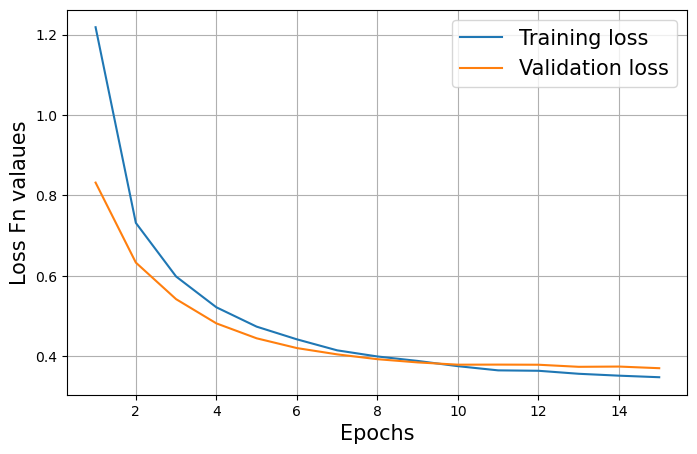

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,16)), h.history['loss'], label='Training loss')
plt.plot(list(range(1,16)), h.history['val_loss'], label='Validation loss')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss Fn valaues', fontsize=15)

Text(0, 0.5, 'Accuracy')

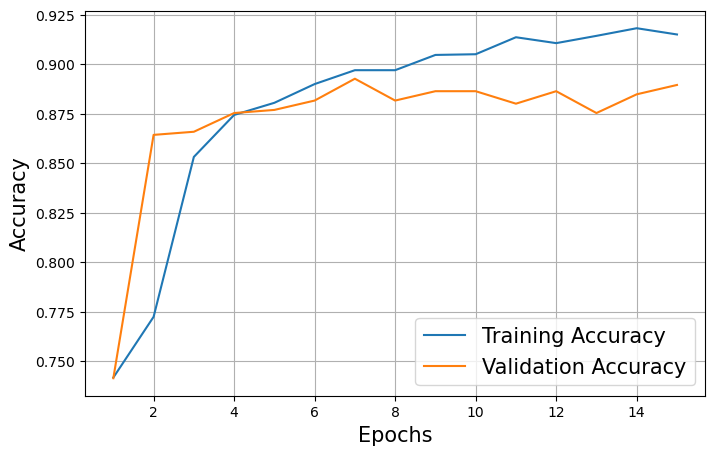

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,16)), h.history['accuracy'], label='Training Accuracy')
plt.plot(list(range(1,16)), h.history['val_accuracy'], label='Validation Accuracy')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)


In [110]:
# evaluate the model ONCe on the test set
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 88.952023


In [111]:
# evaluate (Train & Test repeated 5 times)
res = evaluate_model(Xtrain, ytrain, Xtest, ytest)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                990400    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 992513 (3.79 MB)
Trainable params: 992513 (3.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1 accuracy: 0.8806

In [112]:
#word embedding using keras embedding layer
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

In [113]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df['tweets_having_swords'], df['label'],  test_size=0.2, random_state=42)

In [114]:
Xtrain.shape

(6336,)

In [115]:
# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
    # integer encode
    encoded = tokenizer.texts_to_sequences(docs)
    
    # pad sequences
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

In [116]:
# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)

# calculate the maximum sequence length
max_length = max([len(s.split()) for s in train_docs])
print('Maximum length: %d' % max_length)

Vocabulary size: 15474
Maximum length: 37


In [117]:
tokenizer = create_tokenizer(Xtrain)
padded_docs_train = encode_docs(tokenizer, max_length, Xtrain)
padded_docs_train

array([[  134,   381,  4946, ...,  4958,  4959,     0],
       [   44,   348,    76, ...,     0,     0,     0],
       [  954,    54,     5, ...,     0,     0,     0],
       ...,
       [   10,   110,    10, ...,     0,     0,     0],
       [   44, 13830,     1, ...,     0,     0,     0],
       [   38,    62,    46, ...,     0,     0,     0]], dtype=int32)

In [118]:
padded_docs_train.shape

(6336, 37)

In [119]:
tokenizer = create_tokenizer(Xtest)
padded_docs_test = encode_docs(tokenizer, max_length, Xtest)
padded_docs_test.shape

(1584, 37)

In [132]:
# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 300, input_length=max_length))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu')) # this layer does feature extraction from the text
    model.add(MaxPooling1D(pool_size=2)) # this layer concentrates to more imp. features
    
    model.add(Conv1D(filters=64, kernel_size=8, activation='relu')) # this layer does feature extraction from the text
    model.add(MaxPooling1D(pool_size=2)) # this layer concentrates to more imp. features
    
    model.add(Flatten()) # feature matrix is collapsed into one dimension.
    model.add(Dense(64, activation='relu', kernel_regularizer='l1'))  # hidden layer
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_regularizer='l1'))  # hidden layer
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid')) # output layer
    
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # summarize defined model
#     model.summary()
#     plot_model(model, to_file='model2.png', show_shapes=True)
    
    return model

In [133]:
# define model
K.clear_session() 
model = define_model(vocab_size, max_length)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 300)           4642200   
                                                                 
 conv1d (Conv1D)             (None, 35, 64)            57664     
                                                                 
 max_pooling1d (MaxPooling1  (None, 17, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 64)            32832     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5, 64)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 320)               0

In [134]:

# fit network
model.fit(padded_docs_train, ytrain, epochs=10, verbose=2, validation_data=(padded_docs_test, ytest))

Epoch 1/10
198/198 - 3s - loss: 4.4924 - accuracy: 0.7361 - val_loss: 1.0334 - val_accuracy: 0.7273 - 3s/epoch - 16ms/step
Epoch 2/10
198/198 - 3s - loss: 0.4335 - accuracy: 0.8441 - val_loss: 1.1267 - val_accuracy: 0.7102 - 3s/epoch - 14ms/step
Epoch 3/10
198/198 - 3s - loss: 0.3323 - accuracy: 0.9253 - val_loss: 1.3407 - val_accuracy: 0.7102 - 3s/epoch - 15ms/step
Epoch 4/10
198/198 - 3s - loss: 0.2874 - accuracy: 0.9381 - val_loss: 1.9764 - val_accuracy: 0.7140 - 3s/epoch - 15ms/step
Epoch 5/10
198/198 - 3s - loss: 0.2561 - accuracy: 0.9452 - val_loss: 2.6098 - val_accuracy: 0.7121 - 3s/epoch - 14ms/step
Epoch 6/10
198/198 - 3s - loss: 0.2336 - accuracy: 0.9511 - val_loss: 2.3561 - val_accuracy: 0.7165 - 3s/epoch - 14ms/step
Epoch 7/10
198/198 - 3s - loss: 0.2209 - accuracy: 0.9536 - val_loss: 2.8096 - val_accuracy: 0.7115 - 3s/epoch - 15ms/step
Epoch 8/10
198/198 - 3s - loss: 0.2082 - accuracy: 0.9549 - val_loss: 3.4494 - val_accuracy: 0.7077 - 3s/epoch - 14ms/step
Epoch 9/10
198/1

In [135]:
# save the model
model.save('model_DL_WE.h5')

In [136]:
# evaluate the model ONCe on the test set
loss, acc = model.evaluate(padded_docs_test, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 71.148992
